In [4]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

fuel_econ = pd.read_csv('fuel-econ.csv')
print (fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff (mpg)')

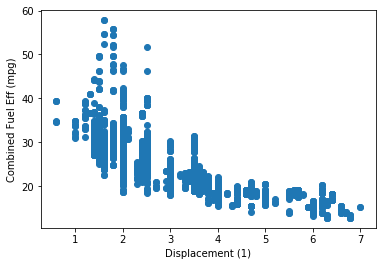

In [6]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff (mpg)")

Text(0, 0.5, 'Combined Fuel Eff (mpg)')

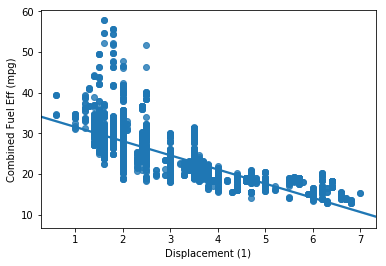

In [7]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff (mpg)")

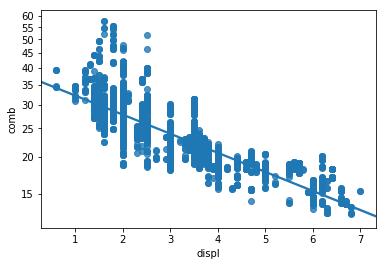

In [13]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans));
tick_locs = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
plt.yticks(log_trans(tick_locs), tick_locs);

Text(0, 0.5, 'Combined Fuel Eff (mpg)')

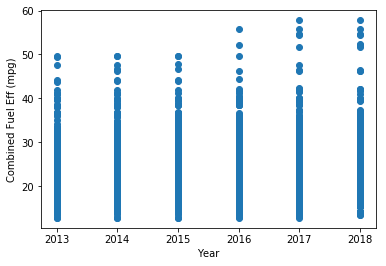

In [14]:
plt.scatter(data = fuel_econ, x = 'year', y = 'comb')
plt.xlabel("Year")
plt.ylabel("Combined Fuel Eff (mpg)")

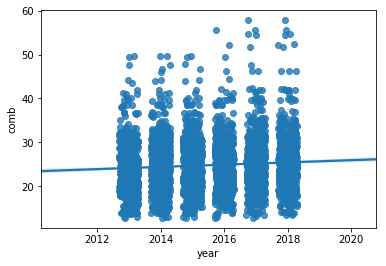

In [16]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter=0.3);


Text(0, 0.5, 'Combined Fuel Eff (mpg)')

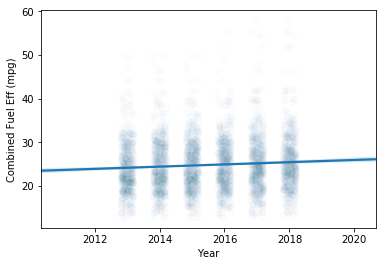

In [23]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/100})
plt.xlabel("Year")
plt.ylabel("Combined Fuel Eff (mpg)")

Text(0, 0.5, 'Combined Fuel Eff (mpg)')

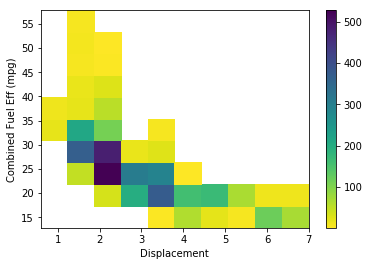

In [30]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.3, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel("Displacement")
plt.ylabel("Combined Fuel Eff (mpg)")

In [31]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


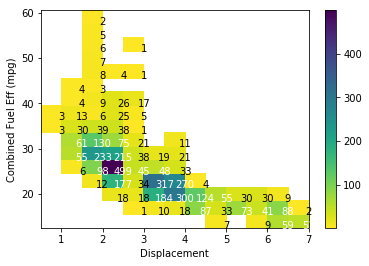

In [39]:
bins_x = np.arange(0.5,7.5, 0.5)
bins_y = np.arange(12.5,58+3, 3)

hist2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.3, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel("Displacement")
plt.ylabel("Combined Fuel Eff (mpg)")

counts = hist2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 40: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

In [43]:
fuel_econ['VClass'].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [48]:
sedan_classes = fuel_econ['VClass'].unique()
vclasses = pd.CategoricalDtype(ordered = True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

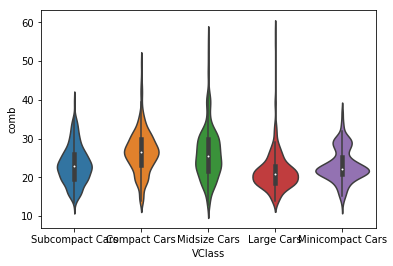

In [49]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

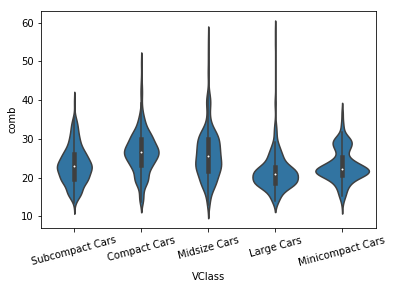

In [54]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

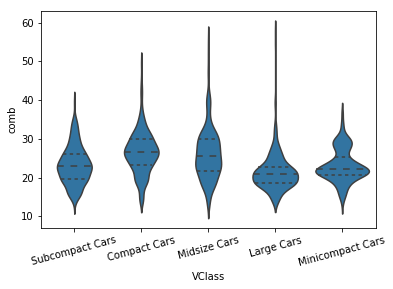

In [57]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner='quartile')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

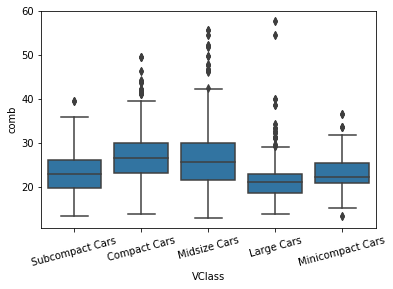

In [55]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15) 

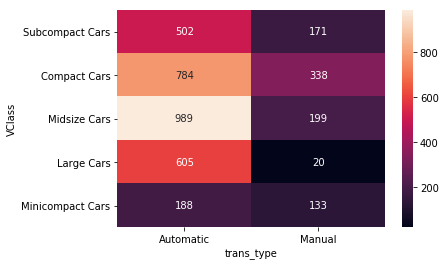

In [68]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values='count')
sb.heatmap(ct_counts, annot=True, fmt='d')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

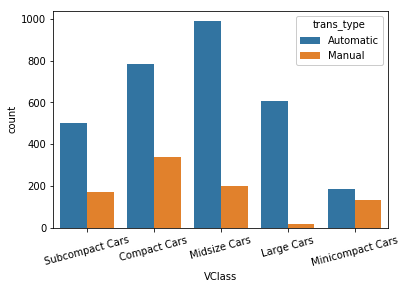

In [84]:
ax = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'trans_type')
plt.xticks(rotation=15) 

# Facet Grid

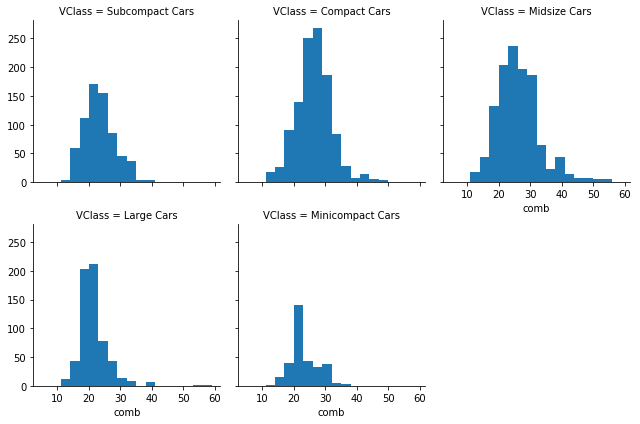

In [89]:
bin_edges = np.arange(5, 58 + 3,3)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3)
g.map(plt.hist, "comb", bins = bin_edges)

# Adapted Bar Chart

Text(0, 0.5, 'Average Combined Fuel Eff')

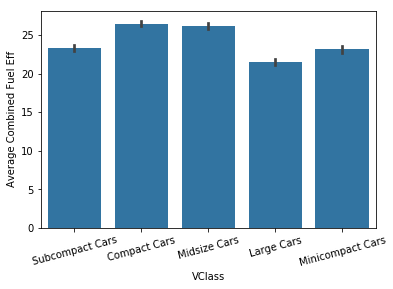

In [90]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15)
plt.ylabel("Average Combined Fuel Eff")

Text(0, 0.5, 'Average Combined Fuel Eff')

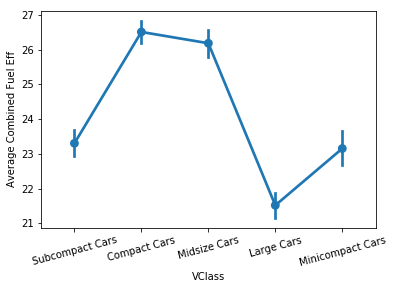

In [91]:
base_color = sb.color_palette()[0]
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15)
plt.ylabel("Average Combined Fuel Eff")

Text(0, 0.5, 'Average Combined Fuel Eff')

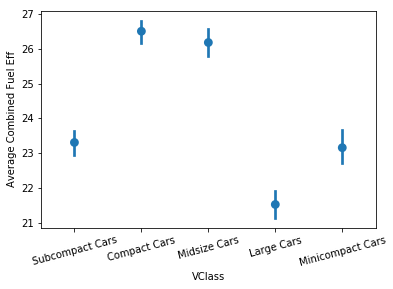

In [93]:
base_color = sb.color_palette()[0]
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, linestyles="")
plt.xticks(rotation=15)
plt.ylabel("Average Combined Fuel Eff")

# Line Plot

Text(0, 0.5, 'Average Combined Fuel Eff')

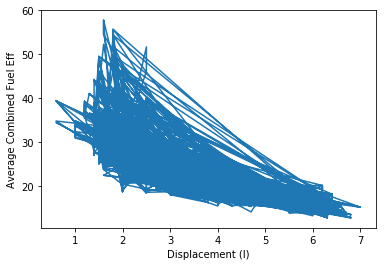

In [97]:
base_color = sb.color_palette()[0]
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb', color = base_color)
plt.xlabel("Displacement (l)")
plt.ylabel("Average Combined Fuel Eff")

Text(0, 0.5, 'Average Combined Fuel Eff')

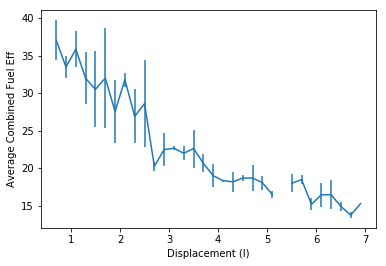

In [116]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_mean = list(map(float,comb_mean)) #this line is very important otherwise you will get an error
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x = bins_c, y = comb_mean, yerr=comb_std)
plt.xlabel("Displacement (l)")
plt.ylabel("Average Combined Fuel Eff")